In [27]:
#Importations
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import json
import pandas as pd
import numpy as np
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob

# modules for generating the word cloud
from os import path, getcwd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [28]:
#get the data
tweets = []
for line in open('tweets.json', 'r'):
    tweets.append(json.loads(line))

df = pd.DataFrame(tweets)
df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Tue Mar 19 11:45:40 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107971396926431232,1107971396926431232,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@KenyaPower_Care today I called customer care ...,True,"{'follow_request_sent': None, 'has_extended_pr..."
1,None,None,Tue Mar 19 11:44:24 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107971077148459009,1107971077148459009,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@KenyaPower_Care a/c 37150964106 has been off ...,True,"{'follow_request_sent': None, 'has_extended_pr..."
2,None,None,Tue Mar 19 11:42:23 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107970570682019841,1107970570682019841,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Check DM @KenyaPower_Care,False,"{'follow_request_sent': None, 'has_extended_pr..."
3,None,None,Tue Mar 19 11:32:25 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107968061821341697,1107968061821341697,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@KenyaPower_Care how long does it take to repl...,False,"{'follow_request_sent': None, 'has_extended_pr..."
4,None,None,Tue Mar 19 11:30:25 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107967558198747137,1107967558198747137,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@KenyaPower_Care Power outage at Kwa Ndege Sta...,False,"{'follow_request_sent': None, 'has_extended_pr..."


In [29]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)


def tokenize(twt):
    #twt = twt.replace("b'RT","")
    twt = re.sub("b+['RT]+", '', twt)
    tweet = tknzr.tokenize(twt)
    filtered_tweet = [re.sub('[^a-zA-Z0-9\s]+', '', w) for w in tweet if not w in stopwords.words('english')]
    filtered_tweet = [x for x in filtered_tweet if not re.match(r'x',x) and not re.match(r'^http',x) ]
    filtered_tweet=' '.join(filtered_tweet)+'\n'
    #filtered_tweet = re.sub("^x.+ ", '', filtered_tweet)
    return str(filtered_tweet)

df['tokenized_text'] = list(map(tokenize, df['text']))


In [31]:
df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,tokenized_text
0,None,None,Tue Mar 19 11:45:40 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107971396926431232,1107971396926431232,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@KenyaPower_Care today I called customer care ...,True,"{'follow_request_sent': None, 'has_extended_pr...",today I called customer care innocent question...
1,None,None,Tue Mar 19 11:44:24 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107971077148459009,1107971077148459009,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@KenyaPower_Care a/c 37150964106 has been off ...,True,"{'follow_request_sent': None, 'has_extended_pr...",c 3715096410 6 hrs Are scheduled maintenance...
2,None,None,Tue Mar 19 11:42:23 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107970570682019841,1107970570682019841,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Check DM @KenyaPower_Care,False,"{'follow_request_sent': None, 'has_extended_pr...",Check DM\n
3,None,None,Tue Mar 19 11:32:25 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107968061821341697,1107968061821341697,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@KenyaPower_Care how long does it take to repl...,False,"{'follow_request_sent': None, 'has_extended_pr...",long take reply balance query via text I wait...
4,None,None,Tue Mar 19 11:30:25 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107967558198747137,1107967558198747137,...,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@KenyaPower_Care Power outage at Kwa Ndege Sta...,False,"{'follow_request_sent': None, 'has_extended_pr...",Power outage Kwa Ndege Stage Embakasi Power ...


In [32]:
def sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    if polarity >0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'
        
df['sentiment'] = list(map(sentiment, df['tokenized_text']))

In [33]:
df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,tokenized_text,sentiment
0,None,None,Tue Mar 19 11:45:40 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107971396926431232,1107971396926431232,...,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@KenyaPower_Care today I called customer care ...,True,"{'follow_request_sent': None, 'has_extended_pr...",today I called customer care innocent question...,positive
1,None,None,Tue Mar 19 11:44:24 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107971077148459009,1107971077148459009,...,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@KenyaPower_Care a/c 37150964106 has been off ...,True,"{'follow_request_sent': None, 'has_extended_pr...",c 3715096410 6 hrs Are scheduled maintenance...,neutral
2,None,None,Tue Mar 19 11:42:23 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107970570682019841,1107970570682019841,...,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Check DM @KenyaPower_Care,False,"{'follow_request_sent': None, 'has_extended_pr...",Check DM\n,neutral
3,None,None,Tue Mar 19 11:32:25 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107968061821341697,1107968061821341697,...,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@KenyaPower_Care how long does it take to repl...,False,"{'follow_request_sent': None, 'has_extended_pr...",long take reply balance query via text I wait...,positive
4,None,None,Tue Mar 19 11:30:25 +0000 2019,"{'symbols': [], 'user_mentions': [{'indices': ...",NaN,0,False,None,1107967558198747137,1107967558198747137,...,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@KenyaPower_Care Power outage at Kwa Ndege Sta...,False,"{'follow_request_sent': None, 'has_extended_pr...",Power outage Kwa Ndege Stage Embakasi Power ...,neutral


In [47]:
#Filter out different groups of comments
is_positive = df['sentiment'] == 'positive'
is_negative = df['sentiment'] == 'negative'
is_neutral = df['sentiment'] == 'neutral'

positive_comments = df[is_positive]['tokenized_text']
negative_comments = df[is_negative]['tokenized_text']
neutral_comments = df[is_neutral]['tokenized_text']


#Remove everything except noun phrases
def nouns_only(text):
    return str(TextBlob(text).noun_phrases)
    
positive_comments = list(map(nouns_only, positive_comments))
negative_comments = list(map(nouns_only, negative_comments))
neutral_comments = list(map(nouns_only, neutral_comments))



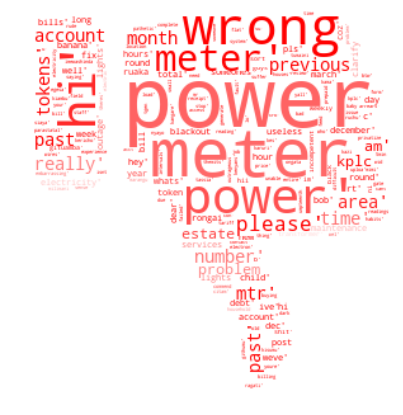

<Figure size 432x288 with 0 Axes>

In [68]:

d = getcwd()
## join all documents in corpus
text = " ".join(negative_comments)
mask = np.array(Image.open(path.join(d, "thumbs down.png")))
#mask = np.array(Image.open(path.join(d, "like.svg"))) 

wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=90, random_state=42)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.savefig('negative.png')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()
plt.savefig('image.jpg')

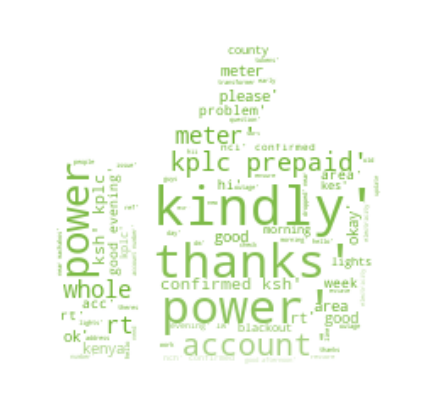

In [49]:
mask = np.array(Image.open(path.join(d, "like.png")))
text = " ".join(positive_comments)

wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=90, random_state=42)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()

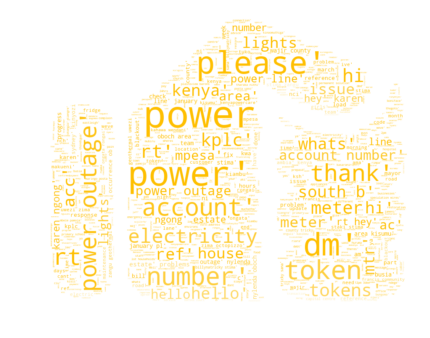

In [54]:
mask = np.array(Image.open(path.join(d, "neutral.png")))
text = " ".join(neutral_comments)

wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=90, random_state=42)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
mask = np.array(Image.open(path.join(d, "neutral.png")))
text = " ".join(neutral_comments)

wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=90, random_state=42)
wc.generate(text)_=plt.show()

In [69]:
# mask1 = np.array(Image.open(path.join(d, "thumbs down.png")))
# text1 = " ".join(negative_comments)

# wc1 = WordCloud(background_color="white", max_words=1000, mask=mask,
#                max_font_size=90, random_state=42)
# wc1.generate(text)
# image_colors1 = ImageColorGenerator(mask1)


# mask2 = np.array(Image.open(path.join(d, "neutral.png")))
# text2 = " ".join(neutral_comments)

# wc2 = WordCloud(background_color="white", max_words=1000, mask=mask,
#                max_font_size=90, random_state=42)
# wc2.generate(text)
# image_colors2 = ImageColorGenerator(mask2)


# mask3 = np.array(Image.open(path.join(d, "like.png")))
# text3 = " ".join(positive_comments)

# wc3 = WordCloud(background_color="white", max_words=1000, mask=mask,
#                max_font_size=90, random_state=42)
# wc3.generate(text)
# image_colors3 = ImageColorGenerator(mask3)


# f, axarr = plt.subplots(1,3,figsize=(7,7))
# axarr[0].imshow(wc1.recolor(color_func=image_colors1), interpolation="bilinear")
# axarr[1].imshow(wc2.recolor(color_func=image_colors2), interpolation="bilinear")
# axarr[2].imshow(wc3.recolor(color_func=image_colors3), interpolation="bilinear")
